In [1]:
!pip install grad-cam
root_folder = '/content/drive/My Drive/Br35H-Mask-RCNN'

from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Br35H-Mask-RCNN"

     |████████████████████████████████| 4.5 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.3.7-py3-none-any.whl size=25953 sha256=67b0381aeade072927fe17d6d055c8fe86d327dde81e3c402890792730b2805d
  Stored in directory: /root/.cache/pip/wheels/30/ab/9c/53c523785edffdc6c61755cf82e0dac3342d0d36190c187894
Successfully built grad-cam
Mounted at /content/drive
/content/drive/My Drive/Br35H-Mask-RCNN


In [2]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50, vgg16
import torch
from pytorch_grad_cam.utils.image import show_cam_on_image, deprocess_image, preprocess_image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

!pip install pretrainedmodels
import pretrainedmodels

import torch
from torch import nn, optim
import torchvision
from torch.nn import functional as F

import torch.nn as nn
import torch.nn.functional as F

import os
import torch
import pandas as pd
from skimage import io, transform

import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import cv2
from PIL import Image
import glob
from scipy.ndimage import gaussian_filter
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 58 kB 2.6 MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=c1a60bfde6bb3bf02710a19d39b9dc736eb9434a347d28fed7bcdb7b41f7d1e5
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built pretrainedmodels


#Generate Class activation Map for data


## Train CAM

In [ ]:
from PIL import Image

dump_model = vgg16(pretrained=True)
dump_target_layers = [dump_model.features[-1]] 
dump_process = transforms.Compose([transforms.ToTensor(),
                                    # transforms.Resize((128, 128)),
                                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

with EigenCAM(model=dump_model, target_layers=dump_target_layers) as dump_cam:
  for i in range (500):
    image_path = os.path.join (root_folder,"TRAIN_ANNOT/y" + str(i) + ".png" )
    dump_img =Image.open(image_path)
    dump_input_tensor = torch.unsqueeze(dump_process(dump_img), 0)
    dump_grayscale_cam = dump_cam(input_tensor=dump_input_tensor, targets=None)[0, :]
    save_path = os.path.join(root_folder,"T_CAM/y" + str(i) + ".npy")
    np.save(save_path, dump_grayscale_cam)

## Validation CAM

In [9]:
dump_model = vgg16(pretrained=True)
dump_target_layers = [dump_model.features[-1]] 
dump_process = transforms.Compose([transforms.ToTensor(),
                                    # transforms.Resize((128, 128)),
                                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

with EigenCAM(model=dump_model, target_layers=dump_target_layers) as dump_cam:
  for i in range (700, 701):
    image_path = os.path.join (root_folder,"VAL_ANNOT/y" + str(i) + ".png" )
    dump_img =Image.open(image_path)
    
    dump_input_tensor = torch.unsqueeze(dump_process(dump_img), 0)
    dump_grayscale_cam = dump_cam(input_tensor=dump_input_tensor, targets=None)[0, :]

    save_path = os.path.join(root_folder,"V_CAM/y" + str(i) + ".npy")
    np.save(save_path, dump_grayscale_cam)

## Test CAM

In [ ]:
dump_model = vgg16(pretrained=True)
dump_target_layers = [dump_model.features[-1]] 
dump_process = transforms.Compose([transforms.ToTensor(),
                                    # transforms.Resize((128, 128)),
                                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

with EigenCAM(model=dump_model, target_layers=dump_target_layers) as dump_cam:
  for i in range (700, 701):
    image_path = os.path.join (root_folder,"TEST_ANNOT/y" + str(i) + ".png" )
    dump_img =Image.open(image_path)
    dump_input_tensor = torch.unsqueeze(dump_process(dump_img), 0)
    dump_grayscale_cam = dump_cam(input_tensor=dump_input_tensor, targets=None)[0, :]

    save_path = os.path.join(root_folder,"TEST_CAM/y" + str(i) + ".npy")
    np.save(save_path, dump_grayscale_cam)

Display one cam example

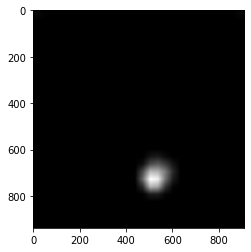

In [ ]:
import numpy as np

img_array = np.load(os.path.join(root_folder,'T_CAM/y30.npy'))
from matplotlib import pyplot as plt

plt.imshow(img_array, cmap='gray')
plt.show()